# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***

Градиент - производная функции потерь относительно одного веса, выполненная для всех весов. Градиент показывает направление наискорейшего роста функции, соответственно градиент, взятый с минусом (антиградиент), показывает направление наискорейшего убывания. Таким образом, беря производные по весам и двигаясь в направлении антиградиента, мы движемся к минимуму функции потерь, то есть находим веса, при которых ошибка минимальна.


$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$, где 

$\frac{\partial L}{\partial w} = \frac{2}{n}\left[\sum_{j=1}^n (\langle\,x_j,w\rangle - y_j)x_{j}\right] + \frac{2}{C}w_{old}$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***

$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$

$\small
\frac{\partial L}{\partial w}  = 
\frac{\partial}{\partial w} \,\frac{-1}{n}\sum_{i=1}^n 
\left[ y^{(i)}\log\left(\sigma\left(w, x^{(i)}\right)\right) +
(1 -y^{(i)})\log\left(1-\sigma\left(w, x^{(i)}\right)\right)\right]
\\[2ex]\small  + \frac{2}{C}w_{old} = \,\frac{-1}{n}\,\sum_{i=1}^n 
\left[ 
y^{(i)}\frac{\partial}{\partial w}\log\left(\sigma\left(w, x^{(i)}\right)\right) +
(1 -y^{(i)})\frac{\partial}{\partial w}\log\left(1-\sigma\left(w, x^{(i)}\right)\right)
\right]
\\[2ex]\Tiny  + \frac{2}{C}w_{old} =\,\frac{-1}{n}\,\sum_{i=1}^n 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial w}\sigma\left(w, x^{(i)}\right)}{\sigma\left(w, x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial w}\left(1-\sigma\left(w, x^{(i)}\right)\right)}{1-\sigma\left(w, x^{(i)}\right)}
\right]
\\[2ex]\Tiny  + \frac{2}{C}w_{old} =\frac{-1}{n}\,\sum_{i=1}^n 
\left[ y^{(i)}\,
\frac{\sigma\left(w, x^{(i)}\right)\left(1-\sigma\left(w, x^{(i)}\right)\right)\frac{\partial}{\partial w}\left(w, x^{(i)}\right)}{\sigma\left(w, x^{(i)}\right)} -
(1 -y^{(i)})\,\frac{\sigma\left(w, x^{(i)}\right)\left(1-\sigma\left(w, x^{(i)}\right)\right)\frac{\partial}{\partial w}\left(w, x^{(i)}\right)}{1-\sigma\left(w, x^{(i)}\right)}
\right]
\\[2ex]\small  + \frac{2}{C}w_{old} =\,\frac{-1}{n}\,\sum_{i=1}^n \left[y^{i}-y^{i}\sigma\left(w, x^{(i)}\right)-
\sigma\left(w, x^{(i)}\right)+y^{(i)}\sigma\left(w, x^{(i)}\right)
\right]\,x^{(i)}
\\[2ex]\small  + \frac{2}{C}w_{old} =\,\frac{-1}{n}\,\sum_{i=1}^n \left[y^{(i)}-\sigma\left(w, x^{(i)}\right)\right]\,x^{(i)} \\[2ex]\small  + \frac{2}{C}w_{old} =\frac{1}{n}\sum_{i=1}^n\left[\sigma\left(w, x^{(i)}\right)-y^{(i)}\right]\,x^{(i)}  + \frac{2}{C}w_{old}
$


$\Tiny\begin{align}\frac{d}{dx}\sigma(x)&=\frac{d}{dx}\left(\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\frac{-(1+e^{-x})'}{(1+e^{-x})^2}\\[2ex]
&=\frac{e^{-x}}{(1+e^{-x})^2}\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right)\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\sigma(x)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\sigma(x)\right)\\[2ex]
&=\sigma(x)\,(1-\sigma(x))
\end{align}$


$\frac{\partial L}{\partial w}  = \frac{1}{n}\sum_{i=1}^n\left[\sigma\left(w, x^{(i)}\right)-y^{(i)}\right]\,x^{(i)} + \frac{2}{C}w_{old}$

Данный градиент такой же как градиент из предыдущего задания, кроме того, что к скалярному произведению применена функция сигма.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

1.
$\nabla Q_w = 2X^TXw-2X^Ty$

Для любой матрицы $A$ имеем соотношение 
$
\frac{\partial Aw}{\partial w_i \partial w_j} = a_{ij}
$. 

Получается, что Гессиан равен $2X^TX$ => положителен по теореме из линейной алгебры (т.к. матрица представима в виде $B^TB$)

Матрица вторых производных положительно определена.
Это действительно точка минимума.

2.
$Q(w) = \frac{1}{N}(Xw-y)^T(Xw-y)+\frac{1}{C}\sum w^2_i$

$\nabla Q_w = \partial_w(w^TX^TXw-w^TX^Ty-y^TXw+y^Ty+\frac{1}{C}\sum w^2_i) = 2X^TXw-2X^Ty+\frac{2}{C}Ew = 0$

$w = (X^TX+\frac{1}{C}E)^{-1}X^TY$ 

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i))$$ 

Следовательно, $\frac{\partial E(L|x_i)}{\partial a(x_i)} = \frac{1 -  p(y_i = 1 | x_i)}{1 - a(x_i)} - \frac{p(y_i = 1 | x_i)}{a(x_i)} = \frac{a(x_i)(1 -  p(y_i = 1 | x_i))-p(y_i = 1 | x_i)(1 - a(x_i))}{a(x_i)(1 - a(x_i))}=\frac{a(x_i) -  p(y_i = 1 | x_i)}{a(x_i)(1 - a(x_i))}$ 


$a(x_i) = p(y_i = 1 | x_i)$
 
Вторая производная $> 0$, следовательно, это точка минимума.


Таким образом $a(x_i) = p(y_i = 1 | x_i)$ минимизирует $E(L| x_i)$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нужен для того, чтобы в случае равенства нулю всех признаков подобрать ответ, более близкий к правильному

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [3]:
import random

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    shuffled = np.array(range(X.shape[0]))
    if shuffle: 
        np.random.shuffle(shuffled)
    
    batches = X.shape[0]//batch_size
    
    for i in range(batches):
        X_batch = X[shuffled[i*batch_size:(i+1)*batch_size]]
        y_batch = y[shuffled[i*batch_size:(i+1)*batch_size]]
        yield (X_batch, y_batch)


# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [4]:
#%%pycodestyle
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size = 1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size 
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        reg = np.dot(self.weights, self.weights)/self.C
        if self.model_type == 'lin_reg':
            loss = ((np.dot(X_batch, self.weights) - y_batch)**2)/X_batch.shape[0]  + reg
        elif self.model_type == 'log_reg':
            loss = -(y_batch * np.log(sigmoid(np.dot(X_batch, self.weights))) + (1- y_batch)*np.log(1-sigmoid(np.dot(X_batch, self.weights))))/X_batch.shape[0] + reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = np.zeros(X_batch.shape[1])
        if self.model_type == 'lin_reg':
            loss_grad = sum([2/X_batch.shape[0]*(np.dot(X_batch[i],self.weights)-y_batch[i])*X_batch[i] for i in range(X_batch.shape[0])])
        elif self.model_type == 'log_reg':
            loss_grad = sum([1/X_batch.shape[0]*(sigmoid(np.dot(X_batch[i],self.weights))-y_batch[i])*X_batch[i] for i in range(X_batch.shape[0])])   
        loss_grad += 2/self.C*self.weights
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        return
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones(X.shape[0])[:, np.newaxis],X))
        # Нужно инициализровать случайно веса
        self.weights = np.ones(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X,y, batch_size = self.batch_size, shuffle = True)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones(X.shape[0])[:, np.newaxis],X))
        if  self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)    
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
import matplotlib.pyplot as plt

def plot_decision_boundary(clf):
    clf.fit(X, y)
    x = range(-4,8)
    plt.plot(x, -(clf.weights[0] + clf.weights[1] * x - 0.3) / clf.weights[2])

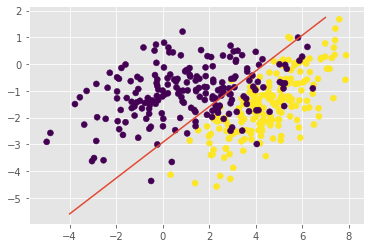

In [6]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
my_batch_generator = batch_generator
lin_regr = MySGDClassifier(my_batch_generator, model_type='lin_reg')
lin_regr.fit(X,y)
plot_decision_boundary(lin_regr)
plt.scatter(X[:,0], X[:,1], c=y)

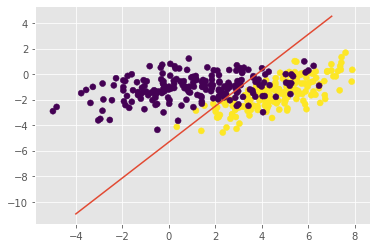

In [7]:
log_regr = MySGDClassifier(my_batch_generator, model_type='log_reg', C = 1000)
log_regr.fit(X,y)
plot_decision_boundary(log_regr)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [13]:
def listmerge1(lstlst):
    all=[]
    for lst in lstlst:
        for el in lst:
            all.append(el)
    return all

In [18]:
lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]

fitted alpha 0.0001
fitted alpha 0.001
fitted alpha 0.01


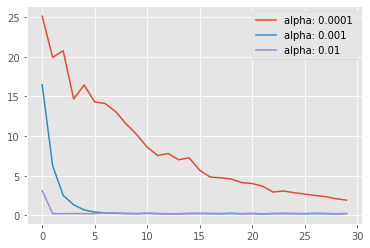

In [33]:
for alpha in [0.0001, 0.001, 0.01]:
    my_clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=10, model_type='lin_reg')
    my_clf.fit(X, y)
    errors = my_clf.errors_log['loss'][0:3000]
    new_err=listmerge1(errors)
    new = lol(new_err, 100)
    itog = []
    for i in new:
        itog.append(sum(i)/len(i))
    plt.plot(range(len(itog)), itog , label='alpha: {}'.format(alpha))
    print("fitted alpha", alpha)
plt.legend()

fitted alpha 0.001
fitted alpha 0.01
fitted alpha 0.1


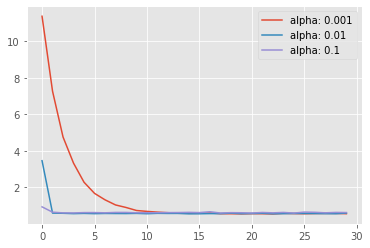

In [34]:
for alpha in [0.001, 0.01, 0.1]:
    my_clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=10, model_type='log_reg')
    my_clf.fit(X, y)
    errors = my_clf.errors_log['loss'][0:3000]
    new_err=listmerge1(errors)
    new = lol(new_err, 100)
    itog = []
    for i in new:
        itog.append(sum(i)/len(i))
    plt.plot(range(len(itog)), itog , label='alpha: {}'.format(alpha))
    print("fitted alpha", alpha)
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Лучшая сходимость в обоих методах при альфа 0.1

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in square
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in multiply
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in subtract
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


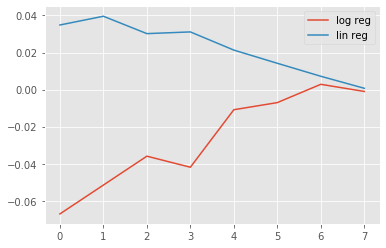

In [36]:
## Your Code Here
lin = []
log = []
for C in np.logspace(3,-3,10):
    my_clf = MySGDClassifier(my_batch_generator, C = C,  alpha= 0.01, max_epoch=10, model_type='lin_reg')
    my_clf.fit(X, y) 
    lin.append(my_clf.weights.mean())
    my_clf = MySGDClassifier(my_batch_generator, C = C,  alpha= 0.01, max_epoch=10, model_type='log_reg')
    my_clf.fit(X, y) 
    log.append(my_clf.weights.mean())

plt.plot(range(len(log)), log, label = 'log reg')
plt.plot(range(len(lin)), lin, label = 'lin reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [195]:
doc_to_title = {}
with open('./docs_titles.tsv/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [196]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [197]:
train_data

,pair_id,group_id,doc_id,target
0,1,1,15731,0
1,2,1,14829,0
2,3,1,15764,0
3,4,1,17669,0
4,5,1,14852,0
...,...,...,...,...
11685,11686,129,26672,0
11686,11687,129,25838,0
11687,11688,129,25703,0
11688,11689,129,27885,0


In [198]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [199]:
def preds_tr(clf, X, tr = 0.5):
    preds = clf.predict(X)
    act_preds = []
    for i in preds:
        if i > tr:
            act_preds.append(1)
        else:
            act_preds.append(0)
    return act_preds

In [200]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [201]:
X = X_train
y = y_train
scaler = StandardScaler()
X = scaler.fit_transform(X)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Разобьем для валидации, чтобы группы текстов не пересекались

In [202]:
validation = []

group0 = np.array(np.where(groups_train < 40))[0][:, np.newaxis] 
group1 = np.array(np.where((40 <= groups_train) & (groups_train < 80)))[0][:, np.newaxis] 
group2 = np.array(np.where((groups_train >= 80)))[0][:, np.newaxis] 

validation.append([np.vstack((group0,group1)).ravel(), group2.ravel()])
validation.append([np.vstack((group0,group2)).ravel(), group1.ravel()])
validation.append([np.vstack((group1,group2)).ravel(), group0.ravel()])

In [203]:
len(np.arange(0.01, 0.5, 0.1))*len(np.logspace(3, -3, 5))*len(range(5, 20, 5))*2

150

In [204]:
all_res = []
i=0
for alpha in np.arange(0.01, 0.5, 0.1):
    for C in np.logspace(3, -3, 5):
        for max_epoch in range(5, 20, 5):
            for model_type in ['log_reg', 'lin_reg']:
                scores = []
                for train, test in validation:
                    my_clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=max_epoch, model_type=model_type, batch_size = 1000, C=C)
                    my_clf.fit(X[train], y[train])
                    pred = my_clf.predict(X[test])
                    scores.append(f1_score(y[test], preds_tr(my_clf, X[test])))
                res = dict()
                res['score'] = sum(scores)/3
                res['C'] = C
                res['alpha'] = alpha
                res['max_epoch'] = max_epoch
                res['model_type']=model_type
                #print(sum(scores)/3, alpha, C, max_epoch, model_type)
                all_res.append(res)
                print(i, end = ' ')
                i+=1

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


19 20 21 22 23 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


24 25 26 27 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars


28 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in square


29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in multiply


88 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in add


89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in add


119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 

In [205]:
score = 0.5
for i in all_res:
    if i['score']>score:
        score = i['score']
        ans = i

In [206]:
ans

{'score': 0.6153447743332637,
 'C': 0.03162277660168379,
 'alpha': 0.01,
 'max_epoch': 15,
 'model_type': 'log_reg'}

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [207]:
for tr in [0.3, 0.4, 0.5, 0.6]:
    scores = []
    for train, test in validation:
        my_clf = MySGDClassifier(batch_generator, alpha=0.01, max_epoch=15, model_type='log_reg', batch_size = 1000, C=0.03162277660168379)
        my_clf.fit(X[train], y[train])
        pred = my_clf.predict(X[test])
        scores.append(f1_score(y[test], preds_tr(my_clf, X[test], tr)))
    print(sum(scores)/3, tr)

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


0.44440251995268804 0.3
0.44440251995268804 0.4
0.6146585251238373 0.5
0.0 0.6


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [208]:
import pandas as pd
train_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [209]:
import numpy as np
y_test = []
X_test = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_test.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
y_test = np.array(y_test)
print (X_test.shape, y_test.shape)

(16627, 15) (16627,)


In [210]:
my_clf = MySGDClassifier(batch_generator, alpha=0.01, max_epoch=15, model_type='log_reg', batch_size = 1000, C=0.03162277660168379)
my_clf.fit(X, y)

/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/home/ann/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in multiply


MySGDClassifier(C=0.03162277660168379, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f0f272207b8>,
                batch_size=1000, max_epoch=15, model_type='log_reg')

In [211]:
scaler = StandardScaler()
X = scaler.fit_transform(X_test)

In [212]:
preds=preds_tr(my_clf, X, 0.5)

In [213]:
import pandas as pd
df = pd.DataFrame()
df['pair_id']=train_data['pair_id']
df["target"] = np.array(preds).astype(bool)
df.to_csv('submit.csv', index=False)

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

***Ник на каггл - Anna Gorelova***

Ссылка - https://github.com/anna-gor/ml/blob/master/hw2/gorelova_hw2.ipynb

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***